# Exploratory Data Analysis of Heart Disease Dataset


## Data set summary
The heart disease data set used in this project is obtained from the UC Irvine machine learning repository. The dataset contains 13 features and the target is a binary variable of 0 and 1, where 0 indicates no presence of heart and 1 indicates presence. Out of the 13 features, there are 8 categorical features and 5 numeric features. These features includes various physiological parameters like resting blood pressure and serum cholestoral levels, as well as potential signs of heart disease like chest pain. The original paper utilized Bayesian model to estimate the probability of having heart disease presence (Robert et al., 1989). There are 303 observations in the dataset with no missing values. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import altair as alt
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [2]:
hd_df = pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv")

In [3]:
hd_df["target"].value_counts().rename({1: "Presence of HD:", 0: "No presence of HD:"})

Presence of HD:       165
No presence of HD:    138
Name: target, dtype: int64

As we can see from the table above, we have a slightly imbalance dataset. There are 165 positive cases (i.e. presence of heart disease) and 138 negative cases.

In [4]:
print(hd_df.dtypes) # all dtypes are numeric
print(hd_df.isnull().values.any())

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object
False


There are no missing values in our dataset. However, the data types for the categorical features are `int64`. We will convert them into `category` datatype first. 

In [5]:
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
hd_df[categorical_features] = hd_df[categorical_features].astype('category')
hd_df.dtypes

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
target         int64
dtype: object

In [6]:
train_df, test_df = train_test_split(hd_df, test_size=0.2, random_state=123, stratify=hd_df["target"])
#the stratify argument makes the ratio of 1 and 0 in the two splits the same

In [7]:
print(train_df["target"].value_counts())
print(test_df["target"].value_counts())


1    132
0    110
Name: target, dtype: int64
1    33
0    28
Name: target, dtype: int64


We split the heart disease dataset into training and test data in a stratified fashion. The number of cases in the two splits is shown in the table below:

| Data split | No presence of HD | Presence of HD |
| --- | --- | --- |
| Training | 110 | 132 |
| Test | 28 | 33 |

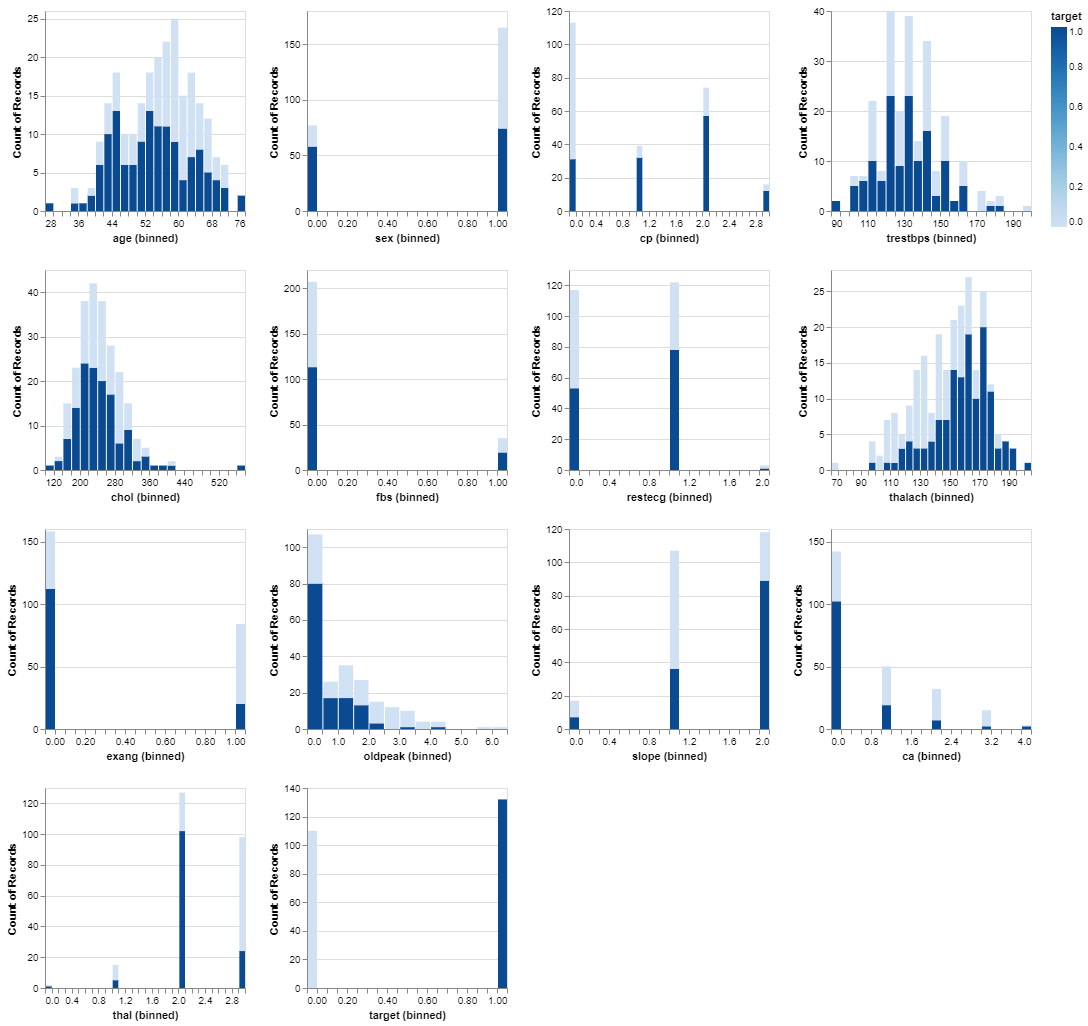

In [8]:
# Analysis of all the feature distributions

feat_dist = alt.Chart(train_df).mark_bar().encode(
    x= alt.X(alt.repeat(), type='quantitative', bin=alt.Bin(maxbins=30)),
    y="count()",
    color="target"
).properties(
    height=200,
    width=200
).repeat(
    train_df.columns.tolist(),
    columns=4
)
feat_dist

To see if any particular feature might be more useful when predicting the target class, the distribution of each feature was plotted and coloured according to the target value. Features are divided into continuous or discrete values, with the continuous variables all having very different distribution means and speads. Discrete features either have counts at 0 or 1 or are spread about three to five distinct values. This visual preliminary analysis helps to highlight what sort of preprocessing will be needed in order to incorporate the features into our predictive model.

In [9]:
# Spearman's correlation values for all of the features and target value
corr = train_df.corr('spearman').style.background_gradient()
corr

,age,trestbps,chol,thalach,oldpeak,target
age,1.000000,0.332554,0.188029,-0.410188,0.274267,-0.181462
trestbps,0.332554,1.000000,0.178360,-0.034358,0.202553,-0.121842
chol,0.188029,0.178360,1.000000,-0.058336,0.032131,-0.076923
thalach,-0.410188,-0.034358,-0.058336,1.000000,-0.451700,0.443831
oldpeak,0.274267,0.202553,0.032131,-0.451700,1.000000,-0.445931
target,-0.181462,-0.121842,-0.076923,0.443831,-0.445931,1.000000


To see if there are any features that are particularly correlated with each other or if the target is correlated to any one particular feature, spearman's correlation values were calculated for all features and the target value. For these values, no two features seem highly correlated with each other, but many slight correlations exist as seen in the more darker coloured/bluer cells. To examine this further visually, we will plot all of the features with each other to view these relationships. 
Before doing that, we also would like to see the relationship between age and the maximum heart rate achieved (`thalach`) for both target classes. This is interesting for two reasons: first, `thalach` has a moderate correlation with target (rho = 0.44); second, there is also a moderate correlation between age and maximum heart rate (rho = -0.41). 

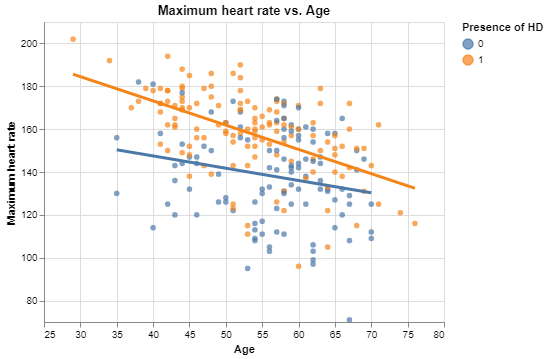

In [10]:
#`thalach` vs `oldpeak` for the two target classes
thalach_age_plot = alt.Chart(train_df, title = "Maximum heart rate vs. Age").mark_circle().encode(
    x = alt.X("age", scale=alt.Scale(zero=False), title = 'Age'),
    y = alt.Y("thalach", scale=alt.Scale(zero=False), title = 'Maximum heart rate'),
    color = alt.Color('target:N', title = "Presence of HD")
)
thalach_age_plot + thalach_age_plot.mark_line(size=3).transform_regression(
    'age', 'thalach', groupby = ['target']
)

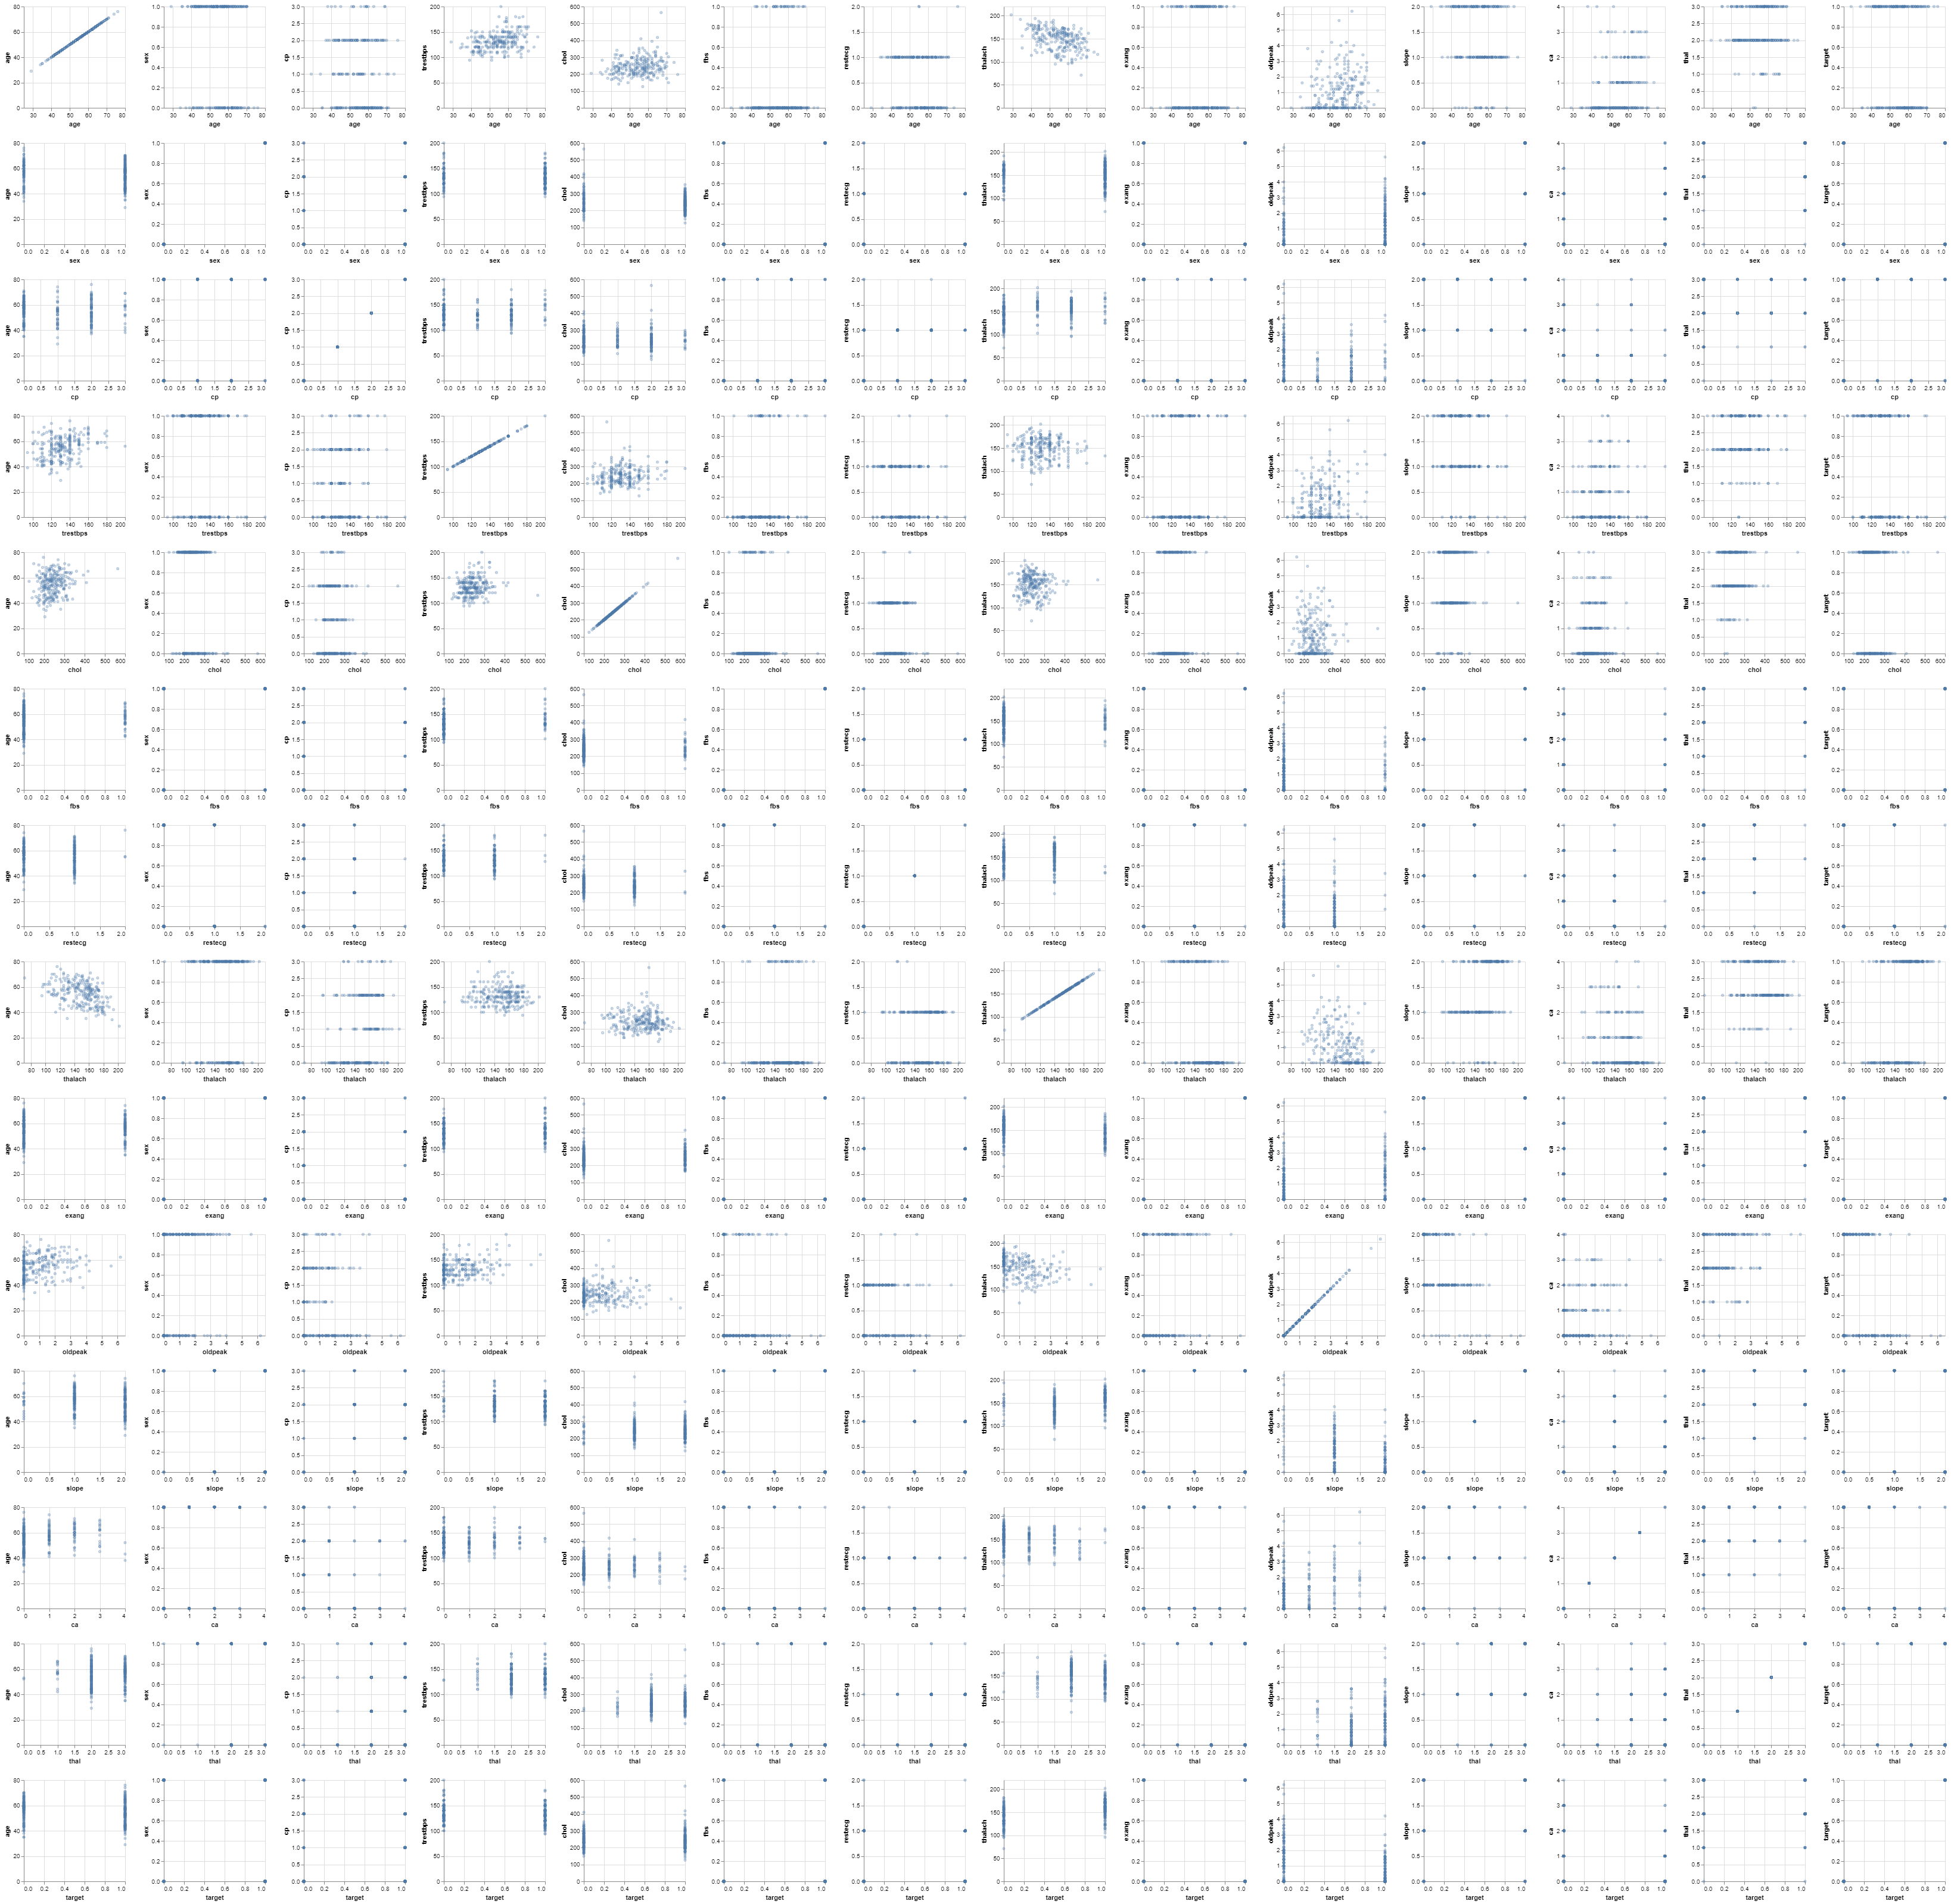

In [11]:
# Plotting the correlations
cols = train_df.columns.tolist()

corr_viz = alt.Chart(train_df).mark_point(opacity=0.4, size=10).encode(
    x=alt.X(alt.repeat("row"), type='quantitative', scale=alt.Scale(zero=False)),
    y=alt.Y(alt.repeat("column"), type='quantitative')
).properties(
    height=170,
    width=170
).repeat(
    column=cols,
    row=cols
)
corr_viz

In agreeance with the correlation plot, visualizations show no significant correlations between any two features or features with the target class. This might mean that for this dataset, the prediciton of the diagnosis of heart disease depends on the accumulation of multiple features rather than just one feature.

## References
Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J. J., Sandhu, S., ... & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. The American journal of cardiology, 64(5), 304-310. https://doi.org/10.1016/0002-9149(89)90524-9

Janosi,Andras, Steinbrunn,William, Pfisterer,Matthias, Detrano,Robert & M.D.,M.D.. (1988). Heart Disease. UCI Machine Learning Repository. https://archive-beta.ics.uci.edu/

